In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap

import numpy as np

%run ../src/coil20_utils.py

In [30]:
all_imgs = load_images()
all_labels = np.arange(0, 1440, dtype=int) // 72

all_imgs.shape


(1440, 16384)

In [83]:
from sklearn.preprocessing import Normalizer 

imgs = Normalizer().fit_transform(
  all_imgs[:720:6, :])
labels = all_labels[:720:6]

imgs.shape


/opt/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


(120, 16384)

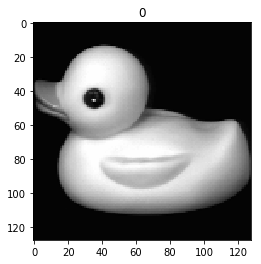

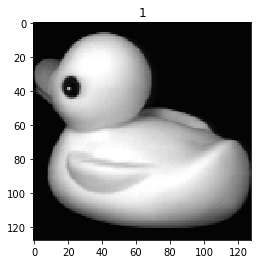

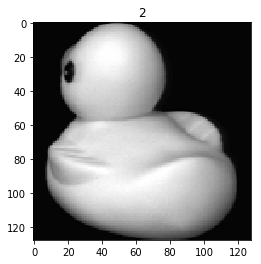

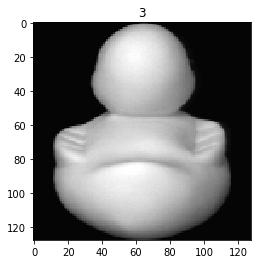

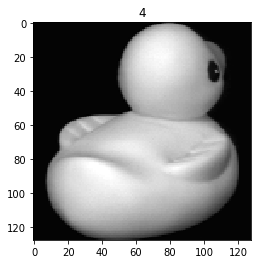

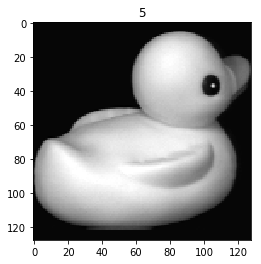

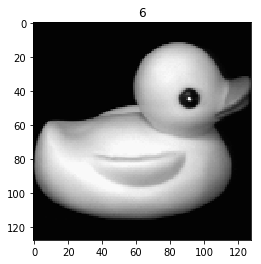

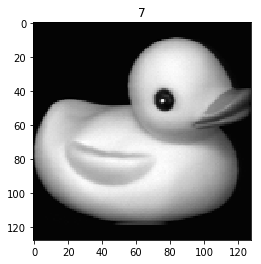

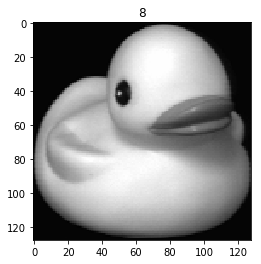

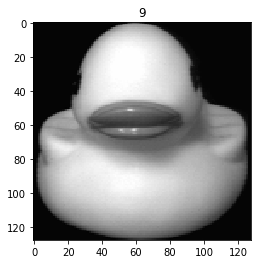

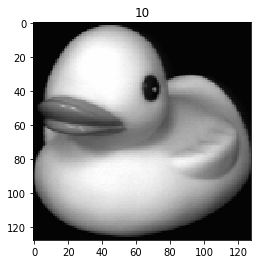

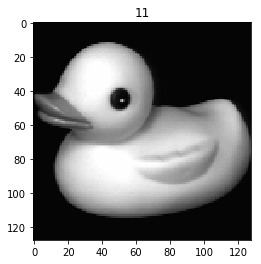

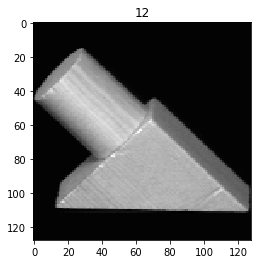

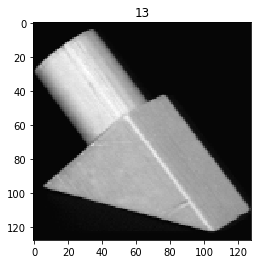

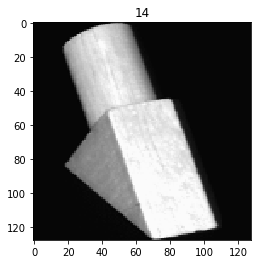

In [84]:
for i in range(15):
  plt.title(i)
  display_image(imgs[i, :], cmap='gray')

In [96]:
lle = LocallyLinearEmbedding(n_neighbors=15)
%time imgs_lle = lle.fit_transform(imgs)

CPU times: user 880 ms, sys: 24 ms, total: 904 ms
Wall time: 893 ms


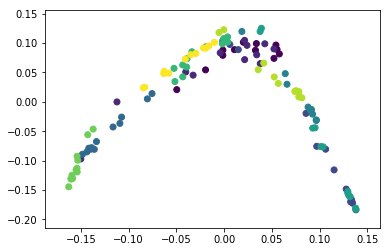

In [97]:
plt.scatter(imgs_lle[:, 0], imgs_lle[:, 1], c=labels)
plt.show()

In [102]:
isomap = Isomap(n_neighbors=8)
%time imgs_isomap = isomap.fit_transform(imgs)

CPU times: user 564 ms, sys: 0 ns, total: 564 ms
Wall time: 560 ms


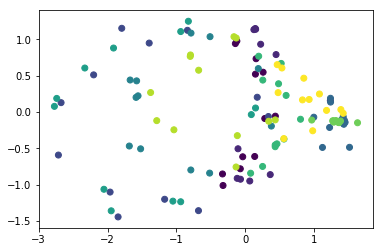

In [103]:
plt.scatter(imgs_isomap[:, 0], imgs_isomap[:, 1], c=labels)
plt.show()